# Сборный проект №1

# Проект "Определение успешности компьютерных игр"

<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Портрет-пользователя-каждого-региона" data-toc-modified-id="Портрет-пользователя-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Портрет пользователя каждого региона</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span><ul class="toc-item"></ul></li></ul></div>

# Определение успешности компьютерных игр

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Предоставлены данные до 2016 года. 

**Цель:** выявить определяющие успешность игры закономерности

**Задачи:**

1. Изучить данные
2. Проверсти предобработку данных  
    - Анализ пропусков    
    - Поиск артефактов (аномалий)    
    - Проверка типов записи данных   
    - Поиск дубликатов   
3. Провести исследовательский анализ данных
    - Сколько игр выпускалось в разные годы
    - Как менялись продажи по платформам
    - Определить актуальный период изучения
    - Определить потенциально прибыльные платформы
    - Изучить, как влияют на продажи отзывы пользователей и критиков
    - Изучить распределение игр по жанрам
4. Составить портрет пользователя каждого региона
    - Самые популярные платформы
    - Самые популярные жанры
    - Определить, влияет ли рейтинг ESRB на продажи в отдельном регионе
5. Проверить гипотезы:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    - Средние пользовательские рейтинги жанров Action и Sports разные

**Данные**

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Инструментарий:**

- *библиотеки:* pandas, matplotlib, scipy
- *работа с данными:* read_csv, info, try-except, set_option, isna, sum, fillna, duplicated, reset_index, groupby, len, loc, astype,  drop, pivot_table, query, sort_values, count, describe, std, unique, corr, to_numpy
- *статистический анализ:* ttest_ind
- *работа с графиками:* hist, boxplot, plot(line, bar, scatter_matrix)
- *определение функций, конструкция if-else*

## Изучение данных из файла

Импорт библиотек и настройки отображения

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
#Показывать все колонки
pd.set_option('display.max_columns', None)
#Вещественные числа показывать в легко читаемом формате
pd.options.display.float_format = '{: .2f}'.format

Импорт данных

In [3]:
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('E:/IT/Yandex/Projects/datasets/games.csv')

In [4]:
# Определим функцию для знакомства с базой данных и проверки её на явные дубликаты
def database_check(db):
    print('Случайные 5 строки базы данных')
    display(db.sample(5, random_state=0))
    print('---')
    print('Общая информация о базе данных')
    db.info()
    print('---')
    print('Пропущенных значений в строках:')
    print(db.isna().sum())
    print('---')
    print('Явных дубликатов в базе данных:', db.duplicated().sum())

In [5]:
database_check(games)

Случайные 5 строки базы данных


,Unnamed: 0,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
7634,7634,Press Your Luck 2010 Edition,DS,2009.00,Misc,0.18,0.00,0.00,0.01,NaN,tbd,E
13771,13771,Aeon Flux,PS2,2005.00,Action,0.02,0.02,0.00,0.01,66.00,5.8,T
3051,3051,Castlevania: Lords of Shadow,X360,2010.00,Action,0.42,0.17,0.01,0.05,83.00,7.8,M
15726,15726,Prince of Stride,PSV,2015.00,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
578,578,Final Fantasy XIII-2,PS3,2011.00,Role-Playing,0.78,0.73,0.89,0.23,79.00,6.6,T


---
Общая информация о базе данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16715 non-null  int64  
 1   Name             16713 non-null  object 
 2   Platform         16715 non-null  object 
 3   Year_of_Release  16446 non-null  float64
 4   Genre            16713 non-null  object 
 5   NA_sales         16715 non-null  float64
 6   EU_sales         16715 non-null  float64
 7   JP_sales         16715 non-null  float64
 8   Other_sales      16715 non-null  float64
 9   Critic_Score     8137 non-null   float64
 10  User_Score       10014 non-null  object 
 11  Rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB
---
Пропущенных значений в строках:
Unnamed: 0            0
Name                  2
Platform              0
Year_of_Release     269
Genre             

In [6]:
print('Данные охватывают период с {start} по {end} год'.format(start=int(games['Year_of_Release'].min()), end=int(games['Year_of_Release'].max())))

Данные охватывают период с 1980 по 2016 год


### Вывод

База данных по играм содержит 11 столбцов и 16715 строк. Явных дубликатов не имеется. Ряд столбцов требует предварительной обработки.

- Все названия столбцов необходимо привести к нижнему регистру
- В столбцах Name и Genre отсутствуют по два значения 
- Year_of_Release содержит отсутствующие значения, необходимо перевести в целочисленный формат
- Critic_Score содержит множество отсутствующих значений и возможно данные можно перевести в целочисленный формат
- User_Score содержит множество отсутствующих значений, часть записей имеет атрибут tbd - 'to be determened'. Необходимо перевести их в формат float после обработки
- Rating содержит множество отсутствующих значений

## Подготовка данных

На основе выявленных при просмотре данных проблем, проведем первичную подготовку данных.

В начале приведем названия колонок к нижнему регистру

In [7]:
games.columns = games.columns.str.lower()

Проверим отсутствующие значения в графе имени

In [8]:
games.query('name.isna()')

,unnamed: 0,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Несмотря на хорошие продажи 659 игры в Северной Америке, по ней отсутствуют практически все значения, ровно как и по 14244 игре. Придётся исключить эти игры из анализа

In [9]:
games = games.drop(games.query('name.isna() == True').reset_index()['index']).reset_index(drop=True)

Отсутствующие значения в графе дата выхода можно было интерпретировать как игры, которые ещё только планируется выпустить. Но такие игры тогда бы не имели таких показателей продаж и рейтинги, в связи с чем можно заключить, что это просто неполнота информации в базе данных. Заменим эти значения на -1, что в нашем исследовании будет означать отсутствие информации.

In [10]:
games['year_of_release'] = games['year_of_release'].fillna(-1).astype(int)

Проверим значения, присутствующие в колонках оценки критиков и оценки пользователей

In [11]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [12]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Оценки критиков даны в процентах от 100, в то время как оценки пользователей даны по 10-бальной шкале. Для удобства сравнения и оптимизации формата хранения данных, приведем все оценки пользователей к оценкам критиков (домножим на 10) и переведем колонки в целочисленный формат.

Отдельно обработаем строки со значением 'tbd' в колонке оценок пользователей. Такая аббревиатура используется, когда оценка ещё не определена. В нашем случае, это равнозначно отсутствию оценки, поэтому как и пропущенные значения, заменим их -1.

In [13]:
#Заменим значения tbd на -1
games.loc[games['user_score'] == "tbd", 'user_score'] = -1
#Заменим пропущенные значения на -1 и приведем пользовательские оценки в формат оценок критиков
games['user_score'] = games['user_score'].fillna(-1).astype(float) * 10
#Переведем пользовательские оценки в челочисленный формат
games['user_score'] = games['user_score'].astype(int)
games.loc[games['user_score'] == -10, 'user_score'] = -1
#Переведем оценки критиков в целочисленный формат
games['critic_score'] = games['critic_score'].fillna(-1).astype(int)

Проверим, какие значения имеются в колонке рейтинга

In [14]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Согласно интернету, указанные рейтинги имеют следующую расшифровку

Современная классификация:
- E	Для всех
- E10+	Для всех старше 10 лет
- T	Подросткам 13—19 лет
- M	От 17 лет

Устаревшая классификация:
- K-A	Для всех(до 1998 года)
- EC	Для детей младшего возраста
- AO	Только для взрослых
- RP	Рейтинг ожидается

Поскольку игры в одном и том же жанре могут быть в совершенно разных рейтинговых категориях, не будем заменять пропущенные значения на наиболее популярные в жанре или на что-то подобное. Заменим их все на значение NA. Так же ожидать появления рейтинга нам смысла нет, в связи с чем заменим и рейтинг RP на NA.

Логично было бы привести старую классификацию рейтингов к современной, но нас интересует прогноз на 2017 год, и скорее всего, для него данные о старых играх включены просто не будут из-за неактуальности, поэтому пока повременим с такой заменой.

In [15]:
games['rating'] = games['rating'].fillna('NA')
games.loc[games['rating'] == 'RP', 'rating'] = 'NA'

Проверим, остались ли пропущенные значения в базе данных

In [16]:
print('Пропущенных значений в базе данных:', games.isna().sum().sum())

Пропущенных значений в базе данных: 0


Для удобства последующего анализа, рассчитаем суммарную сумму продаж по всем регионам

In [17]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

### Вывод

В ходе первичной подготовки данных к исследованию был выполнен ряд преобразований:

- Удалены две записи, не содержащие сведений об имени игры и её жанре
- Названия столбцов заменены на нижний регистр
- Колонки year_of_release, critic_score и user_score переведены в целочисленный формат
- В колонках year_of_release, critic_score и user_score пропущенным значениям присвоен код -1, так как из остальных данных близко к правде информацию в колонках восполнить не представляется возможным
- В колонке rating недостающая информация заполнена значением NA (not available)
- добавлена колонка total_sales, суммирующая продажи игры по всем регионам

В связи с тем, что основная доля пропущенных значений приходится на колонки оценок и рейтинга, можно предположить, что пропуски связаны с отсутствием информации о данных значениях при выгрузке именно этих данных. Скорее всего, полученная для анализа база данных является сборником из нескольких баз данных, наполненных с различной подробностью.

## Исследовательский анализ данных

В начале проверим динамику продаж игр по годам, посмотрев на изменение таких показателей, как количество проданных игр и общая выручка с их продажи

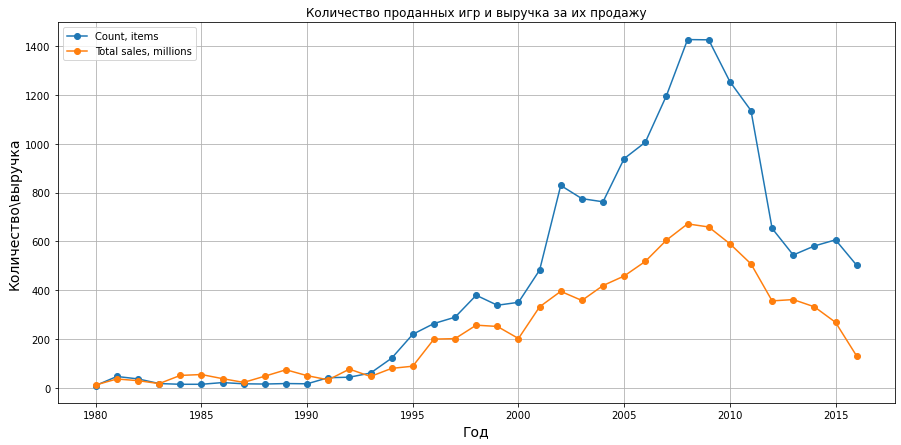

In [18]:
# График для количества проданных игр по годам
games.query('year_of_release > 0').groupby('year_of_release')['name'].count().plot(style='o-', grid=True, label='Count, items', figsize=(15,7))
# График для суммарной выручки от проданных игр по годам
games.query('year_of_release > 0').groupby('year_of_release')['total_sales'].sum().plot(style='o-', grid=True, label='Total sales, millions')
plt.xlabel("Год", size=14)
plt.ylabel("Количество\выручка", size=14)
plt.title("Количество проданных игр и выручка за их продажу")
plt.legend(loc='upper left')
plt.show()

По гистограмме видно, что до середины 90-х видеоигры выпускались объемами не более 100 игр в год. Далее темпы стали стремительно наращиваться и в начале нулевых произошёл резкий скачёк выпуска новых видеоигр до 800 штук в год. Пик выпуска новых игр пришёлся на конец нулевых годов, когда выпускали почти 1,5 тысячи новых игр, после чего выпуски резко снизились в начале 2010-х до 500-600 новых игр. Динамика выручки за компьютерные игры практически полностью повторяет динамику количества выпускаемых игр. Наблюдается такой же подъем выручки от продажи игр с 1980-х до 2008 и резкий спад к 2016 году.

Спад продаж и количества выпускаемых игр довольно подозрителен, так как новости и в целом развитие отрасти говорит об обратном. Если бы количество выпускаемых игр падало, а продажи росли - можно было бы говорить о том, что стали делать меньше, но качественнее. Но тенденция на спад продаж наводит на мысль, что, возможно, не все игры учтены в анализе. 

Проверим, какие платформы представлены в базе данных

In [19]:
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Как и предполагалось, среди платформ представлены только компьютер и всевозможные специализированные игровые приставки. В самом конце 2010-х был совершен качественный скачек в мобильных технологиях, практически у всех пользователей появились призводительные смартфоны и планшеты. Поэтому такой отток капитала можно связать с тем, что бизнес переориентировался на мобильные игры, которые не вошли в представленную базу данных.

Несмотря на ностальгические чувства, первые 14 лет эры видеоигр можно исключить из анализа в связи с крайне малым их производством. 40 лет назад существовали другие критерии присвоения играм рейтингов и оценки критиками, поэтому потенциально такие данные будут мешать. К тому же нас интересует прогноз, а значит чем своевременнее база данных, тем прогноз будет точнее. Создадим отдельную базу данных с играми, выпущенными после 1993 года. Игры, где год выхода не указан, можно не исключать из анализа, так как они с большой долей вероятности могут оказаться произведены в период после 1993 года, но так как их всего 269 значений (1.5%), исключим их тоже, это не сильно повлияет на результат, при этом избавит базу данных от пропущенных значений.

In [20]:
# Создаём отдельную базу данных с играми, вышедшими после 1993 года, 
# из которой исключены игры без указания года выпуска (с присвоенными значениями -1)
game = games.query('year_of_release > 1993')

Проверим динамику выпуска игр на различных платформах. Для этого в начале определим наиболее популярные платформы

In [21]:
# Создадим сводную табличку с группировкой по платформам и выведем её на экран
platforms_pivot = game.pivot_table(index='platform', values='total_sales', aggfunc=['count', 'sum']).reset_index()
platforms_pivot.columns = ['platform', 'count', 'total_sales']
display(platforms_pivot.sort_values(by='count', ascending=False).reset_index().head(10))

,index,platform,count,total_sales
0,14,PS2,2127,1233.56
1,3,DS,2120,802.76
2,15,PS3,1306,931.34
3,24,Wii,1286,891.18
4,26,X360,1232,961.24
5,17,PSP,1193,289.53
6,13,PS,1190,727.58
7,11,PC,950,252.66
8,5,GBA,811,312.88
9,27,XB,803,251.57


Построим графики количества выпущенных игр 10 наиболее популярных игровых платформ и графики суммарных выручек с этих платформ по годам

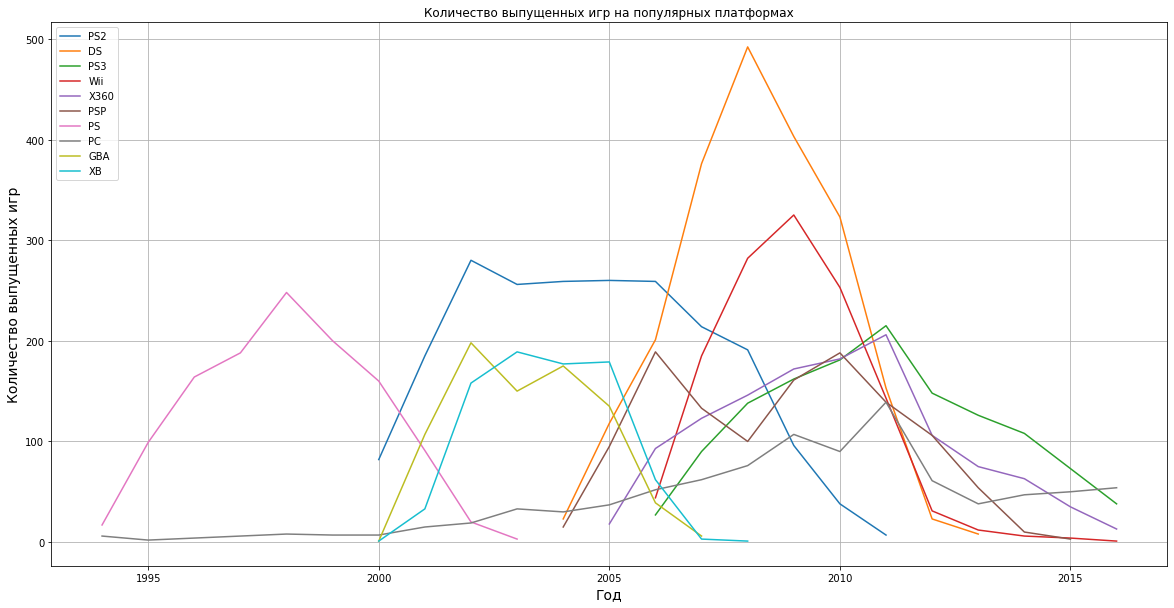

In [22]:
# Поместим на один график 10 наиболее популярных платформ по количеству выпущенных игр
game.query('platform == "PS2"').groupby('year_of_release')['total_sales'].count().plot(grid=True, label='PS2', figsize=(20,10))
game.query('platform == "DS"').groupby('year_of_release')['total_sales'].count().plot(grid=True, label='DS')
game.query('platform == "PS3"').groupby('year_of_release')['total_sales'].count().plot(grid=True, label='PS3')
game.query('platform == "Wii"').groupby('year_of_release')['total_sales'].count().plot(grid=True, label='Wii')
game.query('platform == "X360"').groupby('year_of_release')['total_sales'].count().plot(grid=True, label='X360')
game.query('platform == "PSP"').groupby('year_of_release')['total_sales'].count().plot(grid=True, label='PSP')
game.query('platform == "PS"').groupby('year_of_release')['total_sales'].count().plot(grid=True, label='PS')
game.query('platform == "PC"').groupby('year_of_release')['total_sales'].count().plot(grid=True, label='PC')
game.query('platform == "GBA"').groupby('year_of_release')['total_sales'].count().plot(grid=True, label='GBA')
game.query('platform == "XB"').groupby('year_of_release')['total_sales'].count().plot(grid=True, label='XB')
plt.xlabel("Год", size=14)
plt.ylabel("Количество выпущенных игр", size=14)
plt.title("Количество выпущенных игр на популярных платформах")
plt.legend(loc='upper left')
plt.show()

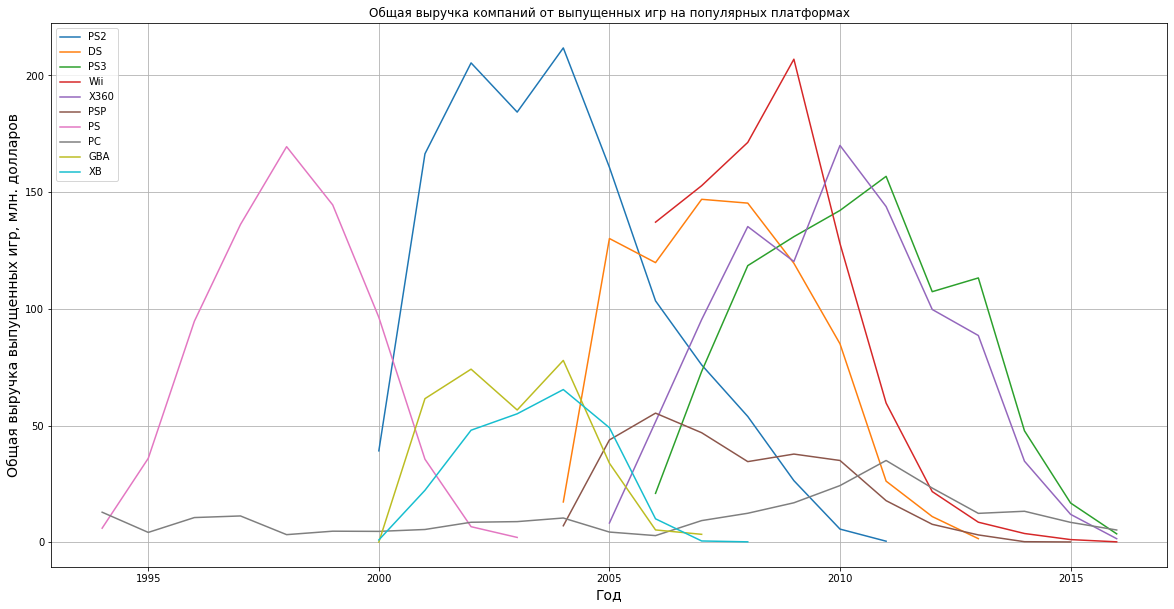

In [23]:
# Поместим на один график 10 наиболее популярных платформ по выручке с выпущенных игр
game.query('platform == "PS2"').groupby('year_of_release')['total_sales'].sum().plot(grid=True, label='PS2', figsize=(20,10))
game.query('platform == "DS"').groupby('year_of_release')['total_sales'].sum().plot(grid=True, label='DS')
game.query('platform == "PS3"').groupby('year_of_release')['total_sales'].sum().plot(grid=True, label='PS3')
game.query('platform == "Wii"').groupby('year_of_release')['total_sales'].sum().plot(grid=True, label='Wii')
game.query('platform == "X360"').groupby('year_of_release')['total_sales'].sum().plot(grid=True, label='X360')
game.query('platform == "PSP"').groupby('year_of_release')['total_sales'].sum().plot(grid=True, label='PSP')
game.query('platform == "PS"').groupby('year_of_release')['total_sales'].sum().plot(grid=True, label='PS')
game.query('platform == "PC"').groupby('year_of_release')['total_sales'].sum().plot(grid=True, label='PC')
game.query('platform == "GBA"').groupby('year_of_release')['total_sales'].sum().plot(grid=True, label='GBA')
game.query('platform == "XB"').groupby('year_of_release')['total_sales'].sum().plot(grid=True, label='XB')
plt.xlabel("Год", size=14)
plt.ylabel("Общая выручка выпущенных игр, млн. долларов", size=14)
plt.title("Общая выручка компаний от выпущенных игр на популярных платформах")
plt.legend(loc='upper left')
plt.show()

По графику выпуска игр хорошо читается, что каждая платформа имеет свой жизненный цикл около 10 лет. По характеру графики напоминают горы с относительно плавным набором популярности и плавным спадом. Это связано с развитием технологий, что более новые игры требуют обновления производительности платформ. Очень хорошо такую закономерность можно проследить на линейке PlayStation. Каждое новое обновление платформы PS выпускается примерно в середине спада выпуска игр на предыдущей платформе, чтобы в среднем стабильно иметь доход и аудиторию. 

Так же по графикам можно заменить, что пик продаж видеоигр пришёлся на конец 2000-х по причине, что было запущено одновременно несколько новых платформ в середине 2000-х, которые стали популярны: PS2, X360, DS, Wii. Поэтому через несколько лет на них было выпущено рекордное количество игр, суммарно принёсших максимальный доход в индустрию за время существования видеоигр на тех платформах, что мы рассматриваем. Кстати, пик выпуска новых игр в конце 2000-х объясняется высоким влиянием платформы Nintendo DS, на которой было выпущенно огмроное количество миниигр, фактически предвосхитив распространение мобильных игр через портативный формат приставки.

Единственная платформа, которая существовала всегда - это старый добрый персональный компьютер. Немного лукаво его помещать в одну категорию, так как очевидно, имеется в виду все варианты компьютеров, выпущенных в эти года. Но так как и количество выпущенных игр, и заработки с них всё время оставались не самыми высокими (привет, пиратство?), это простительно.

Наша задача - построить прогноз на 2017 года на основе имеющихся данных. Судя по предыдущему опыту, каждая платформа живёт в районе 10 лет, кроме ПК, но его пик популярности в плане игр как будто уже прошел в 2012 году. Оказывается, что вообще среди основных 10 платфор, ни одна не показывает рост после 2012 года и к 2016 году общая выручка с продажи игр на этих платформах стремится к нулю, кроме вечного ПК. 

Следовательно, для прогноза нас интересует период последней динамики рынка, то есть с 2014 года, когда спад пошёл на практически всех платформах. Период 2-3 года вполне подходит для краткосрочного прогнозирования на следующий (после 2016) год.

Создадим базу данных с играми, вышедшими после 2013 года - то есть актуальными. В этот период наиболее популярны были две конкурирующие приставки PlayStation4 и XBox One, а так же продукт компании Nintendo - портативная игровая консоль 3DS.

In [24]:
# Создадим отдельную базу данных для игр, участвующих в нашем прогнозном анализе
agame = game.query('year_of_release > 2013')

Посмотрим, какая динамика количества выпущенных игр и выручки за них наблюдалась в выбранный период по всем платформам, чей вклад был хоть как-то заметен

In [25]:
# Создадим сводную табличку с группировкой по платформам и выведем её на экран 
aplatforms_pivot = agame.pivot_table(index='platform', values=['total_sales'], aggfunc=['count', 'sum']).reset_index()
aplatforms_pivot.columns = ['platform', 'count', 'total_sales']
# В качестве критерия значимости отберем платформы, на которых было выпущено более 100 игр 
# и которые принесли более 10 млн. долларов суммарной выручки по всем играм
aplatforms_pivot = aplatforms_pivot.query('count > 100 & total_sales > 10')
display(aplatforms_pivot.sort_values(by='count', ascending=False).reset_index())

,index,platform,count,total_sales
0,3,PS4,376,288.15
1,5,PSV,295,22.40
2,9,XOne,228,140.36
3,2,PS3,219,68.18
4,0,3DS,212,86.68
5,1,PC,151,27.05
6,8,X360,111,48.22


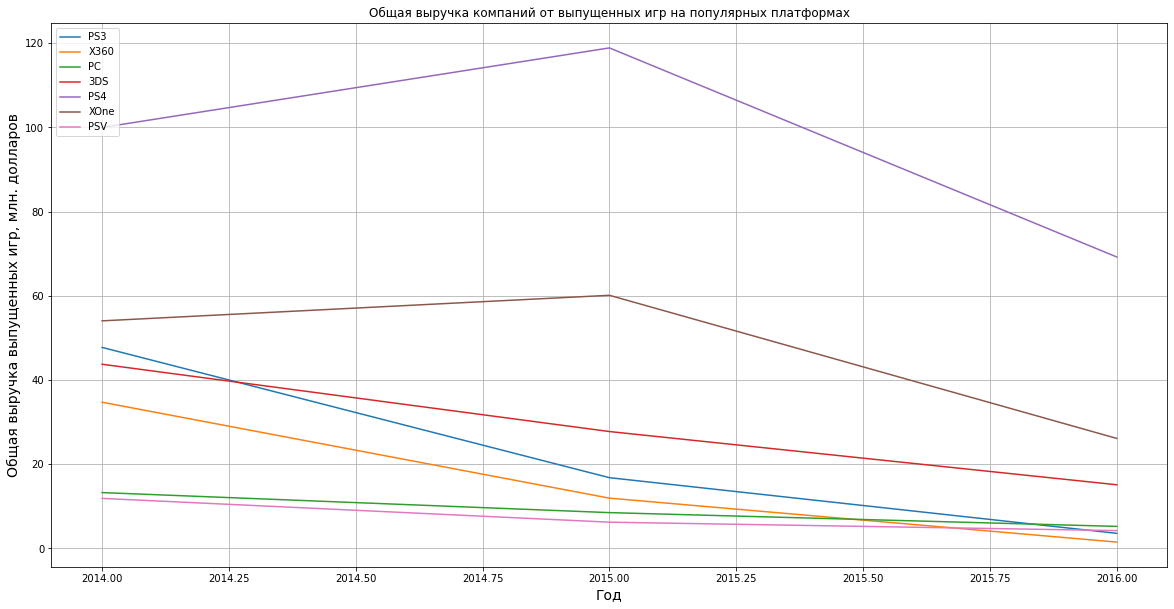

In [26]:
# Поместим динамику общей выручки с выбранных платформ на один график
agame.query('platform == "PS3"').groupby('year_of_release')['total_sales'].sum().plot(grid=True, label='PS3', figsize=(20,10))
agame.query('platform == "X360"').groupby('year_of_release')['total_sales'].sum().plot(grid=True, label='X360')
agame.query('platform == "PC"').groupby('year_of_release')['total_sales'].sum().plot(grid=True, label='PC')
agame.query('platform == "3DS"').groupby('year_of_release')['total_sales'].sum().plot(grid=True, label='3DS')
agame.query('platform == "PS4"').groupby('year_of_release')['total_sales'].sum().plot(grid=True, label='PS4')
agame.query('platform == "XOne"').groupby('year_of_release')['total_sales'].sum().plot(grid=True, label='XOne')
agame.query('platform == "PSV"').groupby('year_of_release')['total_sales'].sum().plot(grid=True, label='PSV')
plt.xlabel("Год", size=14)
plt.ylabel("Общая выручка выпущенных игр, млн. долларов", size=14)
plt.title("Общая выручка компаний от выпущенных игр на популярных платформах")
plt.legend(loc='upper left')
plt.show()

Картина печальная, рынок схлопывается. Даже хорошо стартовавшие в 2013 году PS4 и XOne, новые поколения классических приставок от мировых гигантов индустрии, уже в 2016 стали показывать отрицательную динамику. Тем не менее, именно они и 3DS показали наибольшие результаты по продажам в 2016 году, следовательно, являются нашей наиболее репрезентативной выборкой. Так же в неё интересно включить компьютерные игры, так как в отличие от всех остальных платформ, эта - вечная, и даже при малых объемах продаж вряд ли в обозримом будущем изчезнет совсем.

Посмотрим на эти четыре платформы более внимательно. Построим диаграммы "ящик с усами", чтобы посмотреть, как распредется выручка с игр на этих платформах

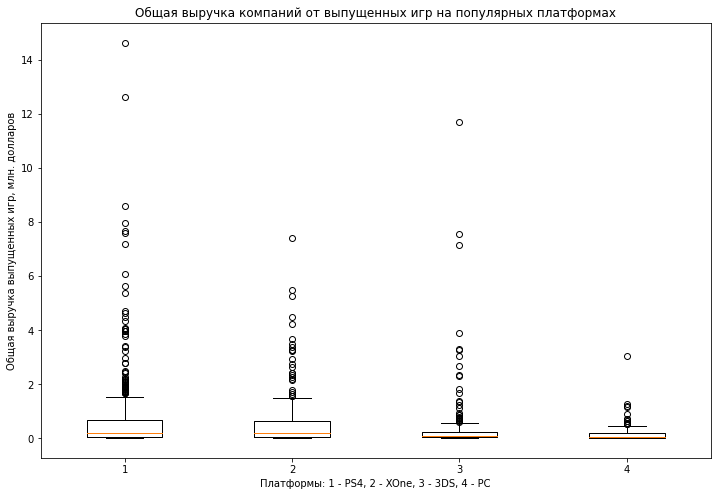

In [27]:
x1=agame.query('platform == "PS4"')['total_sales'].to_numpy()
x2=agame.query('platform == "XOne"')['total_sales'].to_numpy()
x3=agame.query('platform == "3DS"')['total_sales'].to_numpy()
x4=agame.query('platform == "PC"')['total_sales'].to_numpy()

plt_1 = plt.figure(figsize=(12, 8))
plt.boxplot([x1, x2, x3, x4])
plt.xlabel("Платформы: 1 - PS4, 2 - XOne, 3 - 3DS, 4 - PC", size=10)
plt.ylabel("Общая выручка выпущенных игр, млн. долларов", size=10)
plt.title("Общая выручка компаний от выпущенных игр на популярных платформах")
plt.show()

Видно, что у каждой из платформ есть флагманы - игры, которые выстреливают сильнее, чем основная масса. Причем доля таких игр настолько значтельна, что сами диаграммы буквально "сжимаются" под плотным весом выбросов. Но если рассмотреть в диаграммах медиану, то можно видеть, как она смещена на всех платформах книзу, то есть основная доля выпущенных игр приносит довольно мало денег компаниям.

При дальнейшем анализе необходимо будет исключать влияние отдельных наиболее популярных игр, так как они сильно искажают общую картину. Так как для каждой платформы свои показатели высокой и низкой выручки, в зависимости от количества выпущенных игр, пока не будем исключать из базы данных выбивающиеся значения по какой-то общей планке, а сделаем это для каждой платформы индивидуально

В дальнейшем анализе нам крайне интересны данные по соответствию продаж рейтингам пользователей и критиков. Посчитаем, сколько записей об играх для каждой платформы содержат данные и о пользовательских, и о критических оценках.

In [28]:
print('Количество записей с указанными рейтингами игры на платформе PS4:', agame.query('platform == "PS4" & critic_score > 0 & user_score > 0')['name'].count().sum())
print('Количество записей с указанными рейтингами игры на платформе XOne:', agame.query('platform == "XOne" & critic_score > 0 & user_score > 0')['name'].count().sum())
print('Количество записей с указанными рейтингами игры на платформе 3DS:', agame.query('platform == "3DS" & critic_score > 0 & user_score > 0')['name'].count().sum())
print('Количество записей с указанными рейтингами игры на платформе PC:', agame.query('platform == "PC" & critic_score > 0 & user_score > 0')['name'].count().sum())

Количество записей с указанными рейтингами игры на платформе PS4: 234
Количество записей с указанными рейтингами игры на платформе XOne: 151
Количество записей с указанными рейтингами игры на платформе 3DS: 47
Количество записей с указанными рейтингами игры на платформе PC: 115


Оказывается, игры для PS4 больше обсуждаются на профессиональных площадках и имеют больше остальных оценок критиков и пользователей. Изучим сначала эту платформу

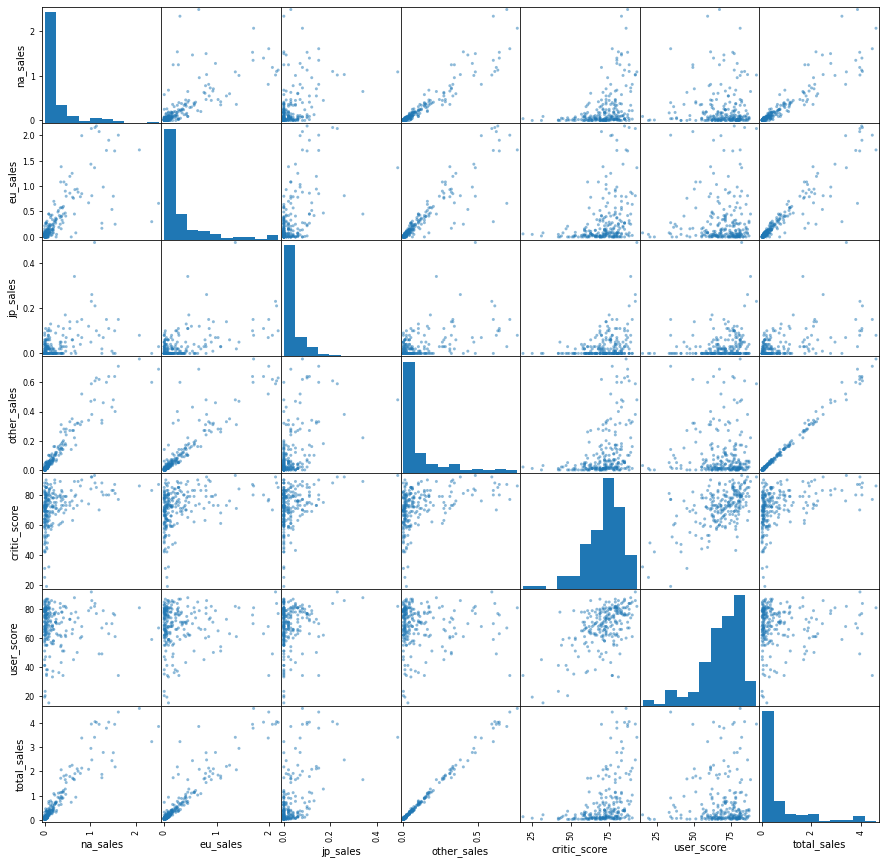

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
na_sales,1.000000,0.718257,0.404958,0.944903,0.384542,-0.013294,0.919769
eu_sales,0.718257,1.000000,0.545542,0.906103,0.333255,0.030029,0.931685
jp_sales,0.404958,0.545542,1.000000,0.503019,0.329529,0.198752,0.554828
other_sales,0.944903,0.906103,0.503019,1.000000,0.391334,0.007374,0.996519
critic_score,0.384542,0.333255,0.329529,0.391334,1.000000,0.577540,0.393945
user_score,-0.013294,0.030029,0.198752,0.007374,0.577540,1.000000,0.020501
total_sales,0.919769,0.931685,0.554828,0.996519,0.393945,0.020501,1.000000


In [29]:
# Создадим базу данных с играми, вышедшими на PS4
ps4_games = agame.query('platform == "PS4"')
# Расчитаем верхнее значение 3 сигм
outlier_up_ps4 = int(ps4_games['total_sales'].mean() + ps4_games['total_sales'].std() * 3)
# Отберем значения без выбросов более 3 сигм, содержащие оценки пользователей и критиков
ps4_games = ps4_games.query('total_sales <= @outlier_up_ps4 & critic_score > 0 & user_score > 0')

#Матрица гистограмм интересующих нас численных показателей
pd.plotting.scatter_matrix(ps4_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'total_sales']], figsize=(15, 15))
plt.show()
#Корреляционная матрица интересующих нас численных показателей
ps4_games_corr = ps4_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'total_sales']].corr()
ps4_games_corr.style.background_gradient(cmap='coolwarm')

Наибольшую корреляцию между собой показывают такие характеристики, как общие продажи и их составляющие: североамериканские продажи и европейские. 

На втором месте по корреляции очевидные показатели: оценка критиков и оценка пользователей. Хоть корреляция и самая четкая, зато явная. Всё же хорошие игры и в Африке хорошие. 

Наиболее интересный показатель - корреляция между продажами и оценками. Для оценок критиков корреляция есть, но очень малая - 0,3. Сказывается большое количество хорошо оцененных игр, которые по тем или иным причинам не смогли хорошо продастся,  например, из-за проваленной маркетинговой компании или жесткой конкуренции за внимание. По виду графика, также дела обстоят и для оценок пользователей, но тут ещё выше доля хорошо оцененных игр при малых продажах, что по цифрам выливается в полное отсутствие какой-либо корреляции.

Изучим платформу XOne

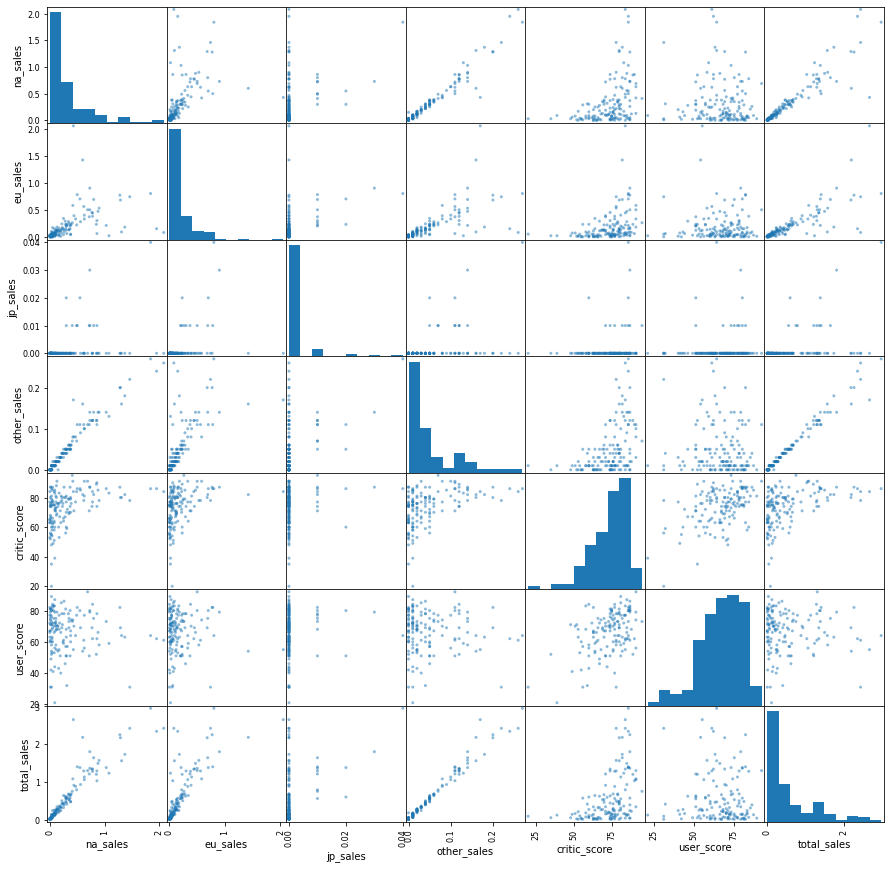

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
na_sales,1.000000,0.486826,0.332894,0.968739,0.416679,-0.053732,0.920181
eu_sales,0.486826,1.000000,0.374139,0.682906,0.350587,-0.003791,0.789850
jp_sales,0.332894,0.374139,1.000000,0.380516,0.173305,0.076877,0.407944
other_sales,0.968739,0.682906,0.380516,1.000000,0.448530,-0.046277,0.986364
critic_score,0.416679,0.350587,0.173305,0.448530,1.000000,0.466519,0.449928
user_score,-0.053732,-0.003791,0.076877,-0.046277,0.466519,1.000000,-0.038749
total_sales,0.920181,0.789850,0.407944,0.986364,0.449928,-0.038749,1.000000


In [30]:
# Создадим базу данных с играми, вышедшими на XOne
XOne_games = agame.query('platform == "XOne"')
# Расчитаем верхнее значение 3 сигм
outlier_up_XOne = int(XOne_games['total_sales'].mean() + XOne_games['total_sales'].std() * 3)
# Отберем значения без выбросов более 3 сигм, содержащие оценки пользователей и критиков
XOne_games = XOne_games.query('total_sales <= @outlier_up_XOne & critic_score > 0 & user_score > 0')

#Матрица гистограмм интересующих нас численных показателей
pd.plotting.scatter_matrix(XOne_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'total_sales']], figsize=(15, 15))
plt.show()
#Корреляционная матрица интересующих нас численных показателей
XOne_games_corr = XOne_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'total_sales']].corr()
XOne_games_corr.style.background_gradient(cmap='coolwarm')

Что ж, тут чуть получше. Те же высокие корреляции в продажах и оценках, но никакой четкой корреляции между ними. Для оценок критиков корреляция почти явная, хоть и не очень высокая - 0,5. Для оценок пользователей корреляция не прощупывается.

Проверим, что с ПК

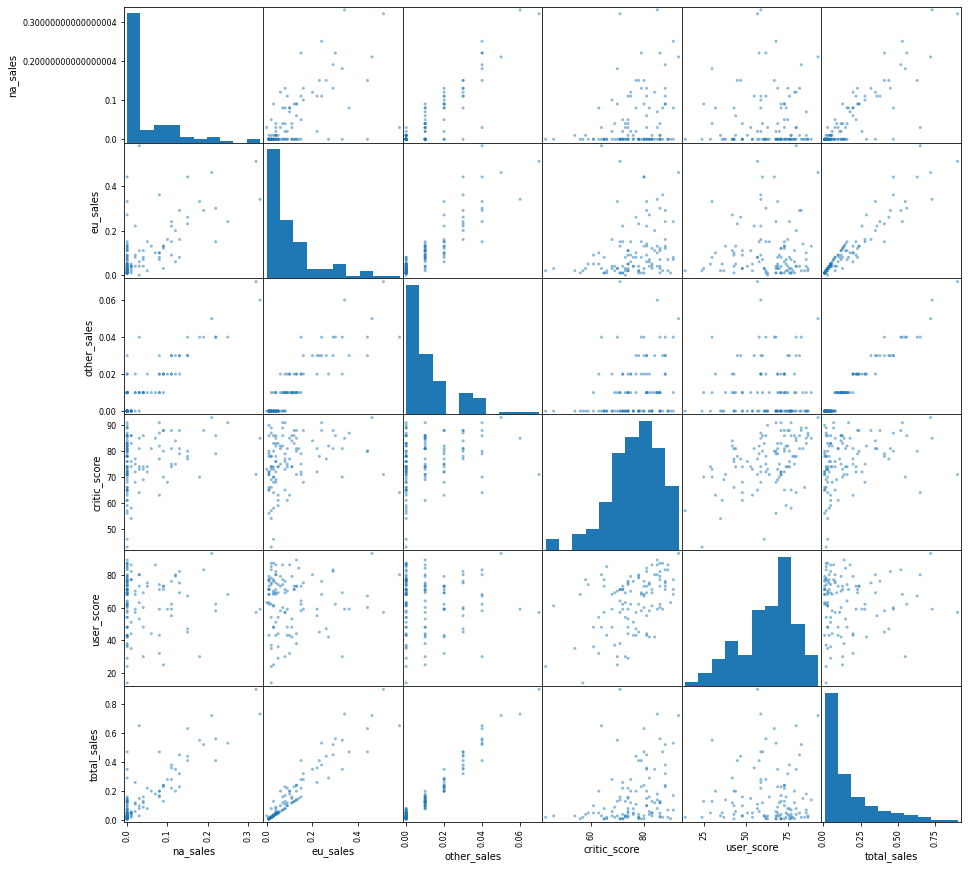

,na_sales,eu_sales,other_sales,critic_score,user_score,total_sales
na_sales,1.000000,0.644362,0.896406,0.277447,-0.007793,0.855996
eu_sales,0.644362,1.000000,0.886894,0.248678,0.027080,0.946769
other_sales,0.896406,0.886894,1.000000,0.290609,0.002897,0.978913
critic_score,0.277447,0.248678,0.290609,1.000000,0.462615,0.285119
user_score,-0.007793,0.027080,0.002897,0.462615,1.000000,0.014465
total_sales,0.855996,0.946769,0.978913,0.285119,0.014465,1.000000


In [31]:
# Создадим базу данных с играми, вышедшими на ПК
pc_games = agame.query('platform == "PC"')
# Расчитаем верхнее значение 3 сигм
outlier_up_pc = int(pc_games['total_sales'].mean() + pc_games['total_sales'].std() * 3)
# Отберем значения без выбросов более 3 сигм, содержащие оценки пользователей и критиков
pc_games = pc_games.query('total_sales <= @outlier_up_pc & critic_score > 0 & user_score > 0')

#Матрица гистограмм интересующих нас численных показателей
pd.plotting.scatter_matrix(pc_games[['na_sales', 'eu_sales', 'other_sales', 'critic_score', 'user_score', 'total_sales']], figsize=(15, 15))
plt.show()
#Корреляционная матрица интересующих нас численных показателей
pc_games_corr = pc_games[['na_sales', 'eu_sales', 'other_sales', 'critic_score', 'user_score', 'total_sales']].corr()
pc_games_corr.style.background_gradient(cmap='coolwarm')

Корреляция между оценками и продажами крайне слабая, всего 0,3 для критиков и практический 0 для пользователей.

Проверим, есть ли общая тенденция не по одной из платформ, а по всем платформам нашей актуальной выборки

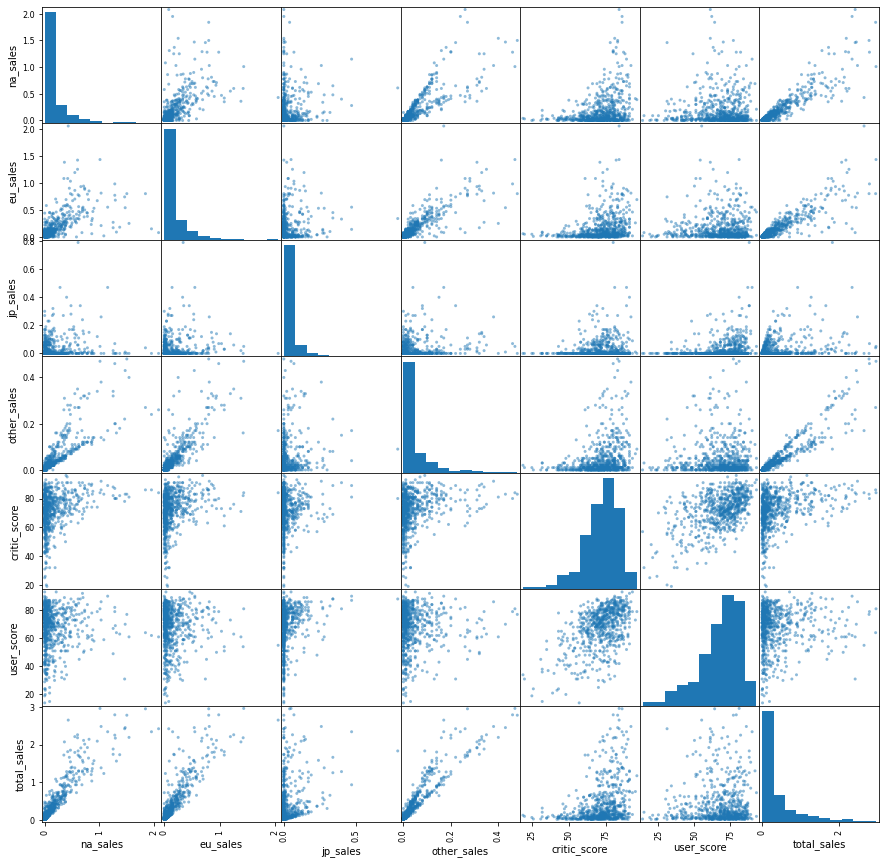

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
na_sales,1.000000,0.607056,0.142561,0.825438,0.301903,0.008993,0.906730
eu_sales,0.607056,1.000000,0.134874,0.813762,0.269368,0.011594,0.867710
jp_sales,0.142561,0.134874,1.000000,0.168148,0.110038,0.247390,0.276392
other_sales,0.825438,0.813762,0.168148,1.000000,0.267873,0.023646,0.930901
critic_score,0.301903,0.269368,0.110038,0.267873,1.000000,0.519501,0.321150
user_score,0.008993,0.011594,0.247390,0.023646,0.519501,1.000000,0.043033
total_sales,0.906730,0.867710,0.276392,0.930901,0.321150,0.043033,1.000000


In [32]:
# Расчитаем верхнее значение 3 сигм
outlier_up_all = int(agame['total_sales'].mean() + agame['total_sales'].std() * 3)
# Отберем значения без выбросов более 3 сигм, содержащие оценки пользователей и критиков
agame_sales = agame.query('total_sales <= @outlier_up_all & critic_score > 0 & user_score > 0')

#Матрица гистограмм интересующих нас численных показателей
pd.plotting.scatter_matrix(agame_sales[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'total_sales']], figsize=(15, 15))
plt.show()
#Корреляционная матрица интересующих нас численных показателей
agame_sales_corr = agame_sales[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'total_sales']].corr()
agame_sales_corr.style.background_gradient(cmap='coolwarm')

В среднем по больнице картина та же самая, слабая корреляция продаж с оценками критиков и практически её отсутствие с оценками пользователей. Человеческим глазом видно, что некая тенденция есть, что чем выше рейтинги, тем больше продаж, но она крайне размыта.

Посмотрим, как продажи игр распределяются по жанрам

In [33]:
# Создадим отдельную базу данных, не содержащую выбросы более 3 сигм по выручке
agame_cut = agame.query('total_sales <= @outlier_up_all')
# Сгруппируем данные по жанру
genre_pivot = agame_cut.pivot_table(index=['genre'], values='total_sales', aggfunc=['count', 'sum']).reset_index()
genre_pivot.columns = ['genre', 'count', 'total_sales']
# Рассчитаем показатель средней выручки с игры
genre_pivot['game_price'] = genre_pivot['total_sales'] / genre_pivot['count']
# Выведем полученную таблицу на экран
display(genre_pivot.sort_values(by='game_price', ascending=False))

,genre,count,total_sales,game_price
8,Shooter,109,69.50,0.64
10,Sports,154,72.58,0.47
4,Platform,37,14.88,0.40
6,Racing,68,20.43,0.30
7,Role-Playing,214,60.09,0.28
2,Fighting,58,15.80,0.27
3,Misc,111,27.96,0.25
0,Action,608,146.33,0.24
9,Simulation,42,7.03,0.17
5,Puzzle,14,2.21,0.16


Всего в базе данных представлены 12 жанров, в которых создавались игры с 2014 года. Сложно судить о том, какие жанры более прибыльны, какие менее, так как каждая игра может оказаться как паззлом на 10 минут, так и годами разрабатываемой РПГ на полгода прохождения. Отчасти это можно сгладить в показателе, сколько дохода приносит в среднем игра в каждом жанре, но всё же в идеале было бы иметь ещё дополнительную колонку в базе данных с указанием сложности игры, например, среднее время полного прохождения или затраты на создание.

Тем не менее, по имеющимся данным мы можем говорить о том, что в предыдущие (до 2017 года) 3 года наиболее популярными жанрами по количеству выпущенных игр были экшены, с большим отставанием от них - RPG, приключения и спортивные. А по выручке данные совсем другие. Сугубо из-за объемов произвоства игр, больше всего заработали компании на экшенах, но на втором и третьем местах оказались не RPG и приключения, а спортивные и шутеры.

Если судить по средней доходности с каждой игры, как раз жанр шутер выходит на уверенное первое место, на втором месте - жанр спортивных игр, третье место достается жанру бродилок (платформеры). Экшены, занимающие первое место по количеству выпущенных игр, имеют средний доход с каждой из игр, что говорит о том, что игры, скорее всего, небольшие и продаются за малую цену в расчете на массовое приобретение. Хуже всего окупаются приключения, стратегии и паззлы. Современные массовые игроки не готовы тратить своё время на вдумчивый поиск путей развития и спрятанных подсказок, в почёте динамичные игры.

Можно оценить и какие наиболее окупаемые вложения в рейтинг игр по жанрам

In [34]:
# Сгруппируем данные по жанру и рейтингу, предварительно исключив из анализа объекты, где рейтинг не указан
genre_rating_pivot = agame_cut.query('rating != "NA"').pivot_table(index=['genre', 'rating'], values='total_sales', aggfunc=['count', 'sum']).reset_index()
genre_rating_pivot.columns = ['genre', 'rating', 'count', 'total_sales']
# Рассчитаем показатель средней выручки с игры
genre_rating_pivot['game_price'] = genre_rating_pivot['total_sales'] / genre_rating_pivot['count']
# Выведем таблицу на экран
display(genre_rating_pivot)

,genre,rating,count,total_sales,game_price
0,Action,E,35,4.97,0.14
1,Action,E10+,83,31.47,0.38
2,Action,M,110,51.03,0.46
3,Action,T,86,15.50,0.18
4,Adventure,E10+,15,1.85,0.12
5,Adventure,M,21,5.37,0.26
6,Adventure,T,13,0.59,0.05
7,Fighting,E10+,3,1.18,0.39
8,Fighting,M,3,4.21,1.40
9,Fighting,T,32,7.96,0.25


В жанре экшен и шутер лучше всего вкладываться в игры для взрослых, в бродилках и спортивных - для всех.

### Вывод

База данных охватывает период с 1980 по 2016 год. При этом до 1994 года производство игр на всех платформах было настолько незначительным, что мы решили исключить его из анализа. В среднем, каждая платформа живёт в игровом пространстве около 10 лет, при этом практически для всех из 10 наиболее популярных платформ характерен одинаковый паттерн поведения: платформа выходит на рынок, сравнительно быстро набирает популярность, и после пика продаж и выпусков сразу же уходит со сцены, как и пришла. Связано это с моральным устареванием оборудования из-за постоянного развития игровой индустрии и повышения требований к производительности систем.

Для дальнейшего анализа нами был выбран актуальный период за 3 года до года прогнозирования - 2013-2016. За этот период ни одна из сколько либо заметных платформ не показала растущей динамики или хотя бы стагнации. Продажи и количество игр на всех платформах снижается, что можно связать с тем, что растёт популярность мобильных игр на смартфонах и планшетах. По неполным итогам 2016 года, хоть сколько то на плаву остаются три платформы: PS4, XOne, 3DS, и не следует сбрасывать пока со счетов долгожителя в мире платформ - PC. Для каждой из платформ высока доля тех игр, которые приносят значительно больше дохода, чем основная масса.

Анализ продаж игр на всех платформах в выборке, а также по отдельности на PS4, XOne и PC показал практически одинаковые результаты:
- Оценки критиков и оценки пользователей уверенно коррелируют между собой (коэф. 0,5-0,6)
- Оценки критиков хоть как-то коррелируют с продажами игр только по приставке XOne (коэф. 0,5), на остальных приставках связь имеется, но слабая (коэф. 0,3-0,4)
- Оценки пользователей никак не коррелируют с продажами игр (коэф. до 0,2)

Всего в выборке игр на популярных платформах с 2013 по 2016 год представлено 12 жанров. Из них наиболее доходные – это экшены, шутеры, аркады, спортивные игры и бродилки, то есть самые динамичные типы игр. Из них экшены и шутеры лучше всего окупаются с рейтингом для взрослых, аркады – для подростков, спортивные и бродилки – для всех возрастов. Наименее доходные жанры представлены стратегиями, приключениями и паззлами, то есть более вдумчивыми играми, требующими большей усидчивости.

## Портрет пользователя каждого региона

Чтобы сделать прогноз, составим портреты пользователей каждого крупного региона по продажам игр: Серевной Америки, Европы и Японии. Для анализа будем использовать базу актуальный данных за 3 года до 2017.

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5)
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Проверим, какие платформы популярнее всего по регионам

In [35]:
# Сгруппируем выборку по платформам
agame_group = agame.groupby('platform').sum().reset_index()[['platform', 'na_sales', 'eu_sales', 'jp_sales', 'total_sales']]
agame_group = agame_group.query('total_sales > 10')
display(agame_group)

,platform,na_sales,eu_sales,jp_sales,total_sales
0,3DS,22.64,16.12,44.24,86.68
1,PC,7.23,17.97,0.00,27.05
2,PS3,22.05,25.54,11.22,68.18
3,PS4,98.61,130.04,15.02,288.15
5,PSV,2.52,3.53,14.54,22.40
7,WiiU,19.36,13.15,7.31,42.98
8,X360,28.30,15.49,0.08,48.22
9,XOne,81.27,46.25,0.32,140.36


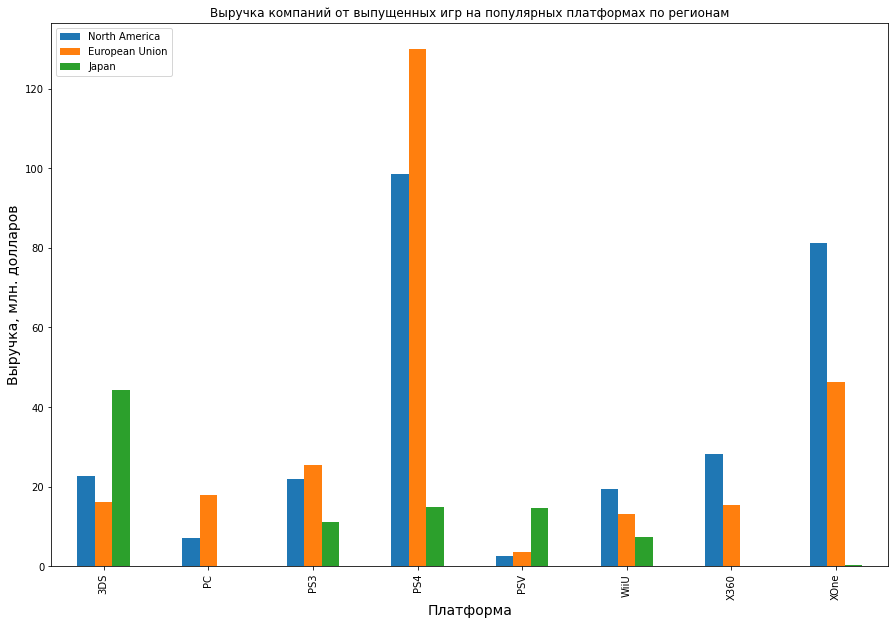

In [36]:
# Построим график с продажами по регионам, сгруппированными по платформам
agame_group.plot(x="platform", y=["na_sales", "eu_sales", "jp_sales"], kind="bar", figsize=(15, 10), label=['North America', 'European Union', 'Japan'])
plt.xlabel("Платформа", size=14)
plt.ylabel("Выручка, млн. долларов", size=14)
plt.title("Выручка компаний от выпущенных игр на популярных платформах по регионам")
plt.legend(loc='upper left')
plt.show()

Для Северной Америки и Европы показатели довольно похожи и топ-5 платформ по окупаемости одинаковые (с небольшой флуктуацией по позициям):
1. PS4
2. XOne
3. X360
4. PS3
5. 3DS/PC


Япония, как родина многих приставок и развитой индустрии видеоигр, имеет свой топ-5, значительно отличающийся от западного рынка:
1. 3DS
2. PS4
3. PSV
4. PS3
5. WiiU

Наибольшее отличие набюдается для компании Microsoft и её приставок XBox - самой популярной приставки на западе. В Японии компания по продвижению этой приставки была довольно провальной и не выдержала конкуренции с родной PlayStation, вплоть до того, что Х для Японцев - это несчастливый знак, а региональные ограничения по выходу игр, наложенные для приставки, задерживали выход новых игр в Японии почти на год. Так же интересно, что в среднем, Япония составляет около 15% мирового рынка индустрии видеоигр, но две японские платформы - 3DS и PSV, принесли доходов в Японии больше, чем в других регионах - производители поняли местный рынок хорошо. 

Проверим, какие жанры популярнее всего по регионам

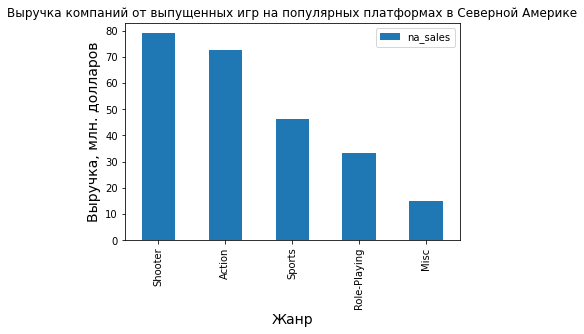

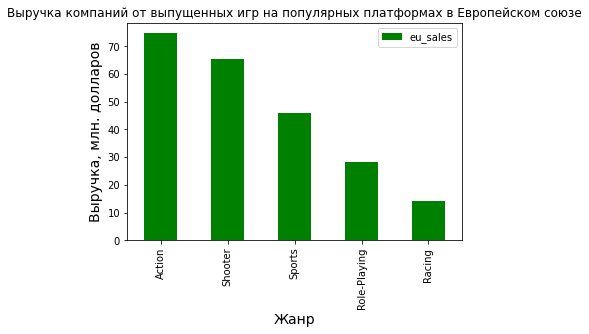

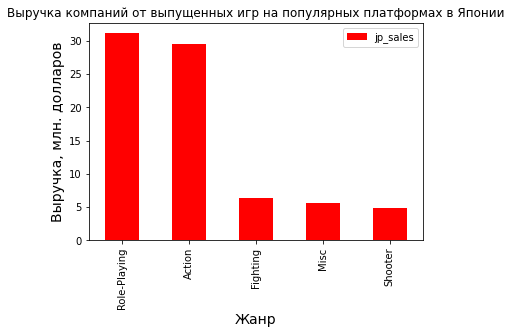

In [37]:
# График с группировкой значений суммарных продаж в СА по жанрам
agame.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
plt.xlabel("Жанр", size=14)
plt.ylabel("Выручка, млн. долларов", size=14)
plt.title("Выручка компаний от выпущенных игр на популярных платформах в Северной Америке")
plt.show()
# График с группировкой значений суммарных продаж в ЕС по жанрам
agame.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar', color='green')
plt.xlabel("Жанр", size=14)
plt.ylabel("Выручка, млн. долларов", size=14)
plt.title("Выручка компаний от выпущенных игр на популярных платформах в Европейском союзе")
plt.show()
# График с группировкой значений суммарных продаж в Японии по жанрам
agame.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar', color='red')
plt.xlabel("Жанр", size=14)
plt.ylabel("Выручка, млн. долларов", size=14)
plt.title("Выручка компаний от выпущенных игр на популярных платформах в Японии")
plt.show()

Культурная близость европейцев и североамериканцев хорошо читается в игровых пристрастиях. Первые 4 жанра по популярности для обоих регионов одинаковые: экшен, шутер, спорт, бродилки, различается лишь пятое место, в Америке это misc, в Европе - гонки. И в Северной Америке любят чуть больше пострелять, чем побегать, а в Европе - наоборот.

В Японии свой менталитет, и здесь обожают РПГ. Далее по популярности идут экшены, файтинги, mics (=без четкой классификации) и шутеры. При этом РПГ и экшены составляют львиную долю японского рынка.

Проверим, как рейтинг влияет на продажи игр в каждом регионе

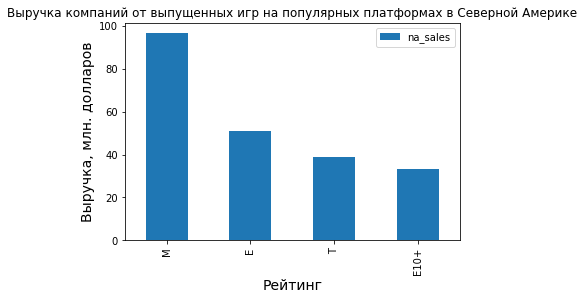

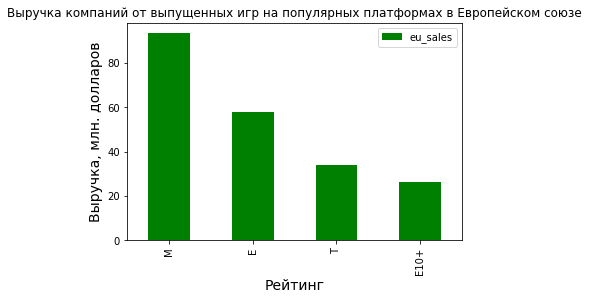

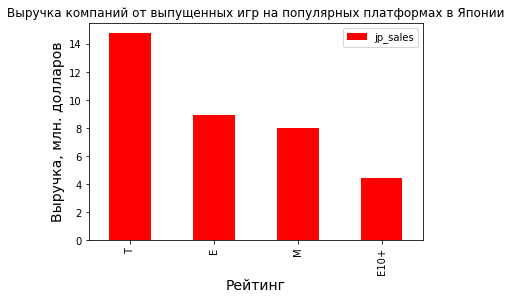

In [38]:
# График с группировкой значений суммарных продаж в СА по рейтингу
agame.query('rating != "NA"').groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).plot(kind='bar')
plt.xlabel("Рейтинг", size=14)
plt.ylabel("Выручка, млн. долларов", size=14)
plt.title("Выручка компаний от выпущенных игр на популярных платформах в Северной Америке")
plt.show()
# График с группировкой значений суммарных продаж в ЕС по рейтингу
agame.query('rating != "NA"').groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).plot(kind='bar', color='green')
plt.xlabel("Рейтинг", size=14)
plt.ylabel("Выручка, млн. долларов", size=14)
plt.title("Выручка компаний от выпущенных игр на популярных платформах в Европейском союзе")
plt.show()
# График с группировкой значений суммарных продаж в Японии по рейтингу
agame.query('rating != "NA"').groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).plot(kind='bar', color='red')
plt.xlabel("Рейтинг", size=14)
plt.ylabel("Выручка, млн. долларов", size=14)
plt.title("Выручка компаний от выпущенных игр на популярных платформах в Японии")
plt.show()

И тут японцы отличаются от западных геймеров. Лушче всего на западе продаются игры для взрослых, в то время как япония делает ставку на подростков. Видимо, как только японец дорастает до трудоспособного возраста, времени на игры у него не остается. Единственное, в чем все регионы солидарны, что меньше всего денег приносят игры для детей.

### Вывод

В целом, жители Северной Америки и Европы очень похожи по игровым пристрастиям, в то время как японцы имеют ряд интересных особенностей.

Наиболее популярными платформами в западных странах являются PS4, XOne, X360, PS3, 3DS и PC. Наиболее популярные жанры - экшен, шутер и спорт. 

Япония не признает продукции XBox, в связи с чем её рейтинг по популярности платформ состоит полностью из продукции отечественных производителей: 3DS, PS4, PSV, PS3, WiiU. Жанровые пристрастия японцев тоже имеют свою специфику. В Японии в первую очередь любят ролевые игры и экшены, при этом остальные жанры одинаково не жалуют.

По влиянию рейтинга на продажи западные регионы похожи, лучше всего продаются игры для взрослых. Япония отличается, лучше продаются игры для подростков. Меньше всего выручки приносят игры для детей во всех регионах.

## Проверка гипотез

Проверим две гипотезы о влиянии выбора платформы или жанра игры на средние пользовательские оценки

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action и Sports разные.

Проверим гипотезу №1. Сформулируем её следующим образом:

- Н0 - Средние пользовательские рейтинги платформы Xbox One равны средним пользовательским рейтингам платформы PC
- H1 - Средние пользовательские рейтинги платформ не равны

Будем рассматривать актуальный временной срез с 2014 по 2016 год, как и ранее.

In [39]:
# Создадим по выборке для каждой платформы с данными после 2013 года и непустыми пользовательскими оценками
xone = games.query('year_of_release > 2013 & platform == "XOne" & user_score > 0')
print('Размер выборки по платформе XBox One:', len(xone))
pc = games.query('year_of_release > 2013 & platform == "PC" & user_score > 0')
print('Размер выборки по платформе PC:', len(pc))

Размер выборки по платформе XBox One: 165
Размер выборки по платформе PC: 122


Выборки имеют одинаковый порядок количества записей, следовательно, сравнивать их правомерно.

Избавим выборки от выбросов для более точного анализа

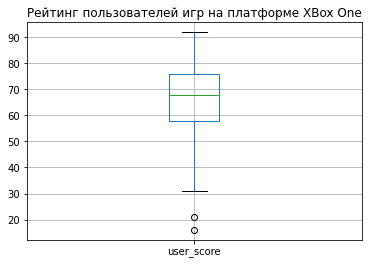

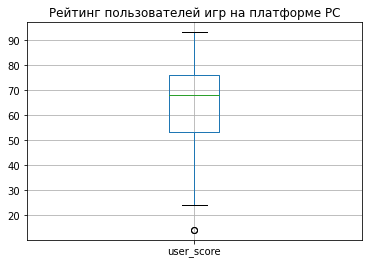

In [40]:
# Построим диаграммы для определения, имеются ли выбросы в данных
xone.boxplot('user_score')
plt.title('Рейтинг пользователей игр на платформе XBox One')
plt.show()
pc.boxplot('user_score')
plt.title('Рейтинг пользователей игр на платформе PC')
plt.show()

In [41]:
# Найдем нижнее пороговое значение выбросов для платформы XBox One
xone_down = xone['user_score'].mean() - xone['user_score'].std() * 3
# Отфильтруем значения ниже порогового
xone = xone.query("user_score > @xone_down")
# Найдем нижнее пороговое значение выбросов для платформы PC
pc_down = pc['user_score'].mean() - pc['user_score'].std() * 3
# Отфильтруем значения ниже порогового
pc = pc.query("user_score > @pc_down")

In [42]:
# Создадим выборку с оценками пользователей для каждой платформы
xone_user_score = xone['user_score']
pc_user_score = pc['user_score']

Поскольку выборки малы, мы можем грубо сравнить средние значения пользовательских оценок по описательной статистике

In [43]:
print('Описательная статистика по платформе XBox One')
display(xone_user_score.describe())
print('Описательная статистика по платформе PC')
display(pc_user_score.describe())

Описательная статистика по платформе XBox One


count    163.00
mean      66.53
std       12.78
min       31.00
25%       58.50
50%       68.00
75%       76.50
max       92.00
Name: user_score, dtype: float64

Описательная статистика по платформе PC


count    122.00
mean      62.98
std       17.03
min       14.00
25%       53.25
50%       68.00
75%       76.00
max       93.00
Name: user_score, dtype: float64

Проверим распределение значений в выборке на нормальность с помощью гистограмм

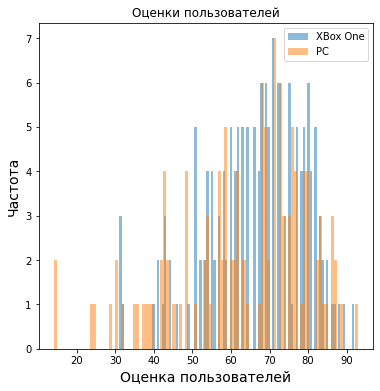

In [44]:
plt.figure(figsize=(6,6))
plt.hist(xone_user_score, bins=100, alpha=0.5, label="XBox One")
plt.hist(pc_user_score, bins=100, alpha=0.5, label="PC")
plt.xlabel("Оценка пользователей", size=14)
plt.ylabel("Частота", size=14)
plt.title("Оценки пользователей")
plt.legend(loc='upper right')
plt.show()

В целом распределение оценок близко к нормальному, при этом максимум оценок смещен ко второй половине диапазона

Проведем сравнение с помощью t-критерия Стьюдента для двух независимых выборок со схожими дисперсиями. Поскольку у нас не очень высокоточный параметр для сравнения, выставим низкий критерий значимости в 1%

In [45]:
#Зададим критерий значимости
alpha_user_score = 0.01

#Расчитаем p-значение
results_user_score = st.ttest_ind(
    xone_user_score, 
    pc_user_score,
    )

print('p-значение:', results_user_score.pvalue)

#Сравним полученный результат с критерием значимости
if results_user_score.pvalue < alpha_user_score:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.045656475218328545
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза о равенстве средних значений не была опровергнута, значит с выбранной долей вероятности средние пользовательские оценки двух платформ одинаковы.

Проверим гипотезу №2. Сформулируем её следующим образом:

- Н0 - Средние пользовательские рейтинги жанров Action и Sports равны
- H1 - Средние пользовательские рейтинги жанров не равны

Будем пользоваться базой данных с 2007 года, как наиболее актуальной для нашего исследования

In [46]:
# Создадим выборку для каждого выбранного жанра с ненулевыми оценками пользователей
action = agame.query('genre == "Action" & user_score > 0')
print('Размер выборки по жанру Action:', len(action))
sports = agame.query('genre == "Sports" & user_score > 0')
print('Размер выборки по жанру Sports:', len(sports))

Размер выборки по жанру Action: 297
Размер выборки по жанру Sports: 127


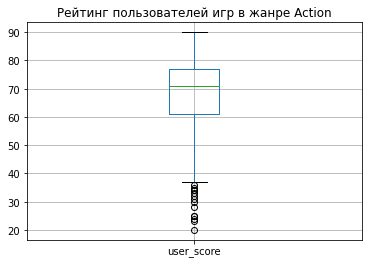

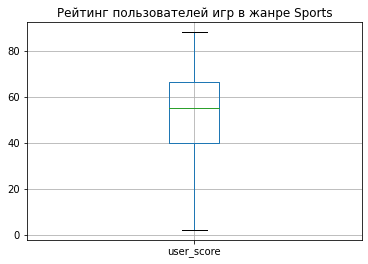

In [47]:
# Построим диаграммы для определения, имеются ли выбросы в данных
action.boxplot('user_score')
plt.title('Рейтинг пользователей игр в жанре Action')
plt.show()
sports.boxplot('user_score')
plt.title('Рейтинг пользователей игр в жанре Sports')
plt.show()

In [48]:
# Найдем нижнее пороговое значение выбросов для жанра экшен
action_down = action['user_score'].mean() - action['user_score'].std() * 3
# Отфильтруем значения ниже порогового
action = action.query("user_score > @action_down")
# Найдем нижнее пороговое значение выбросов для жанра спорт
sports_down = sports['user_score'].mean() - sports['user_score'].std() * 3
# Отфильтруем значения ниже порогового
sports = sports.query("user_score > @sports_down")

In [49]:
# Создадим выборку с оценками пользователей для каждого жанра
action_user_score = action['user_score']
sports_user_score = sports['user_score']

Сравним средние значения пользовательских оценок по описательной статистике

In [50]:
print('Описательная статистика по жанру Action')
display(action_user_score.describe())
print('Описательная статистика по жанру Sports')
display(sports_user_score.describe())

Описательная статистика по жанру Action


count    292.00
mean      68.36
std       12.61
min       28.00
25%       63.00
50%       71.00
75%       77.00
max       90.00
Name: user_score, dtype: float64

Описательная статистика по жанру Sports


count    127.00
mean      52.25
std       18.57
min        2.00
25%       40.00
50%       55.00
75%       66.50
max       88.00
Name: user_score, dtype: float64

Проверим распределение значений в выборке на нормальность с помощью гистограмм

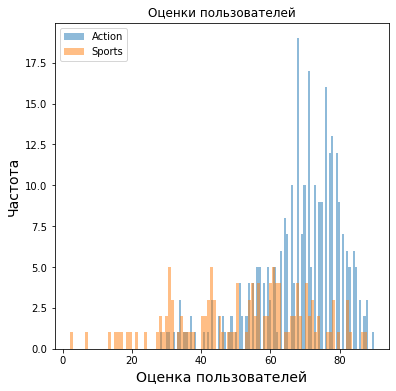

In [51]:
plt.figure(figsize=(6,6))
plt.hist(action_user_score, bins=100, alpha=0.5, label="Action")
plt.hist(sports_user_score, bins=100, alpha=0.5, label="Sports")
plt.xlabel("Оценка пользователей", size=14)
plt.ylabel("Частота", size=14)
plt.title("Оценки пользователей")
plt.legend(loc='upper left')
plt.show()

Распределение нормальное, с ассиметрией влево, то есть чаще пользователи ставят положительные оценки играм, нежели отрицательные

Проведем сравнение с помощью t-критерия Стьюдента для двух независимых выборок со схожими дисперсиями. Мы сравниваем пользовательские оценки, поэтому выставим демократический критерий в 1%

In [52]:
#Зададим критерий значимости
alpha_genre_user_score = 0.01

#Расчитаем p-значение
results_genre_user_score = st.ttest_ind(
    action_user_score, 
    sports_user_score,
    )

print('p-значение:', results_genre_user_score.pvalue)

#Сравним полученный результат с критерием значимости
if results_genre_user_score.pvalue < alpha_genre_user_score:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.9041968612135535e-22
Отвергаем нулевую гипотезу


Нулевая гипотеза о равенстве средних значений отвергнута, значит средние пользовательские оценки для двух жанров не равны.

Для инетереса проверим, какие были средние пользовательские оценки по всем жанрам и платформам в исследуемом периоде

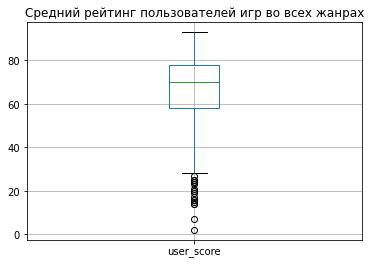

In [53]:
# Создадим выборку по всем жанрам и платформам с ненулевыми оценками
all_genre = agame.query('year_of_release > 2013 & user_score > 0')
# Построим диаграммы для определения, имеются ли выбросы в данных
all_genre.boxplot('user_score')
plt.title('Средний рейтинг пользователей игр во всех жанрах')
plt.show()

In [54]:
# Найдем нижнее пороговое значение выбросов
all_genre_down = all_genre['user_score'].mean() - all_genre['user_score'].std() * 3
# Отфильтруем значения ниже порогового
all_genre = all_genre.query("user_score > @all_genre_down")

In [55]:
print('Средняя пользовательская оценка игр в период с 2014 года: ', int(all_genre['user_score'].median()))

Средняя пользовательская оценка игр в период с 2014 года:  70


### Вывод

Нами было выдвинуто две гипотезы о соотношении средних пользовательских оценок между двумя платформами: XBox One и PC, и между двумя жанрами: Action и Sports. На предварительном этапе выборки по платформам и жанрам были отфильтрованы от выбросов по правилу трех сигм.

Статистическая проверка критерием значимости 1% показала, что средние пользовательские оценки для платформ не отличаются и равны 68 пунктам. А вот жанры различаются по средним оценкам. 67 и 71 пункт - это статистически значимое различие в средних двух выборок в исследуемом диапазоне, несмотря на то, что человек скорее скажет, что значения практически равны.
Изученные средние значения крайне близки к средним значениям по всей выборке - 70 пунктам, что говорит о малой, но местами статистически значимой, зависимости оценок от платформы или жанра.

## Общий вывод

**Данные**

В исследовании были использованы данные о 16715 играх, выпущенных с 1980 по 2016 года на различных платформах. В целом база данных хорошо наполнена и структурирована и потребовала минимальной предварительной обработки.

Рекомендации по сбору данных:

- Обратить внимание на базу данных с оценками пользователей и критиков, велика доля пропущенных значений
- Обратить внимание на базу данных с рейтингом, крайне велика доля пропущенных значений

**Исследовательский анализ данных**

По динамике развития количества выпускаемых игр и выручки от их продаж можно чётко проследить, что 1994 год был переломным моментом в развитии игровой индустрии. Начиная с 1994 года игры стали стремительно расти в производстве и продажах, и пик пришёлся на конец нулевых годов, после чего началось резкое падение. Падение продаж, скорее всего, связано с тем, что база данных не включает мобильных платформ, которые стали активно развиваться с конца нулевых и вытеснять классические приставки и компьютер с игрового поля.

Среднее время жизни каждой платформы составляет около 10 лет, после чего она окончательно устаревает и списывается, а ей на замену чаще всего приходит следующее поколение приставки от того же производителя. Для прогноза игровой индустрии на 2017 год была использована выборка, охватывающая 3 года до 2017, то есть с 2014 по 2016 год. За этот период все платформы показали отрицательную динамику продаж, большинство платформ на состояние 2016 года практически уже не выпускали игр. Единственные три платформы, оставшиеся на плаву - это актуальные для того времени поколения XBox и PlayStation, портативная приставка Nintendo 3DS, плюс мы не стали сбрасывать со счетов старый добрый компьютер.

На основе выборки по этим четырём платформам, была проанализирована связь оценок критиков и пользователей с объемом продаж игр. Было выявлено, что: 
- Оценки критиков немного коррелируют с продажами игр;
- Оценки пользователей никак не коррелируют с продажами игр;
- По жанрам наилучшая окупаемость у динамичных и агрресивных игр, худшая - у спокойных и вдумчивых; 
- Лучше продаются игры, имеющие рейтинг для взрослых или подростков, а хуже всего продаются чисто детские игры.

**Региональные особенности**

Анализ региональных особенностей игровой индустрии выявил, что североамериканцы и европейцы крайне похожи в игровых пристрастиях, японцы заметно отличаются. Наиболее популярная платформа у жителей Запада XBox, жанры - экшен и шутер. Японцы продукцию компании Microsoft не признают и сидят полностью на отечественных приставках, играя только в RPG и шутеры. 

**Связь пользовательского рейтинга игр и их продаж** 

В ходе исследования подтвердилось две гипотезы, касающихся пользовательского рейтинга игр:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action и Sports разные.

**Рекомендации бизнесу**

Чтобы в 2017 году игра была успешна, необходимо учитывать региональные особенности её выпуска:
1. В Северной Америке следует сделать ставку на платформы XBox и PlayStation новейшего поколения или компьютер. Жанр должен быть динамичным, лучший выбор - экшен, желательно с рейтингом для взрослых. Худшая ставка - игры для детей.
2. В Европе следует сделать ставку на платформы PlayStation и XBox новейшего поколения или компьютер. Жанр должен быть динамичным, лучший выбор - экшен, желательно с рейтингом для взрослых. Худшая ставка - игры для детей.
3. В Японии лучше сделать ставку на местые платформы, в приоритете - продукция Nintendo (DS) или Sony (PlayStation) новейшего поколения, на столь популярную на западе продукцию компании Microsoft - XBox ставить не стоит. Лучше всего окупится жанр RPG или экшен в рейтинге для подростков, хуже всего окупятся игры для детей.

Общие рекомендации:

4. При планировании следует больше опираться на мнение критиков, чем пользователей, так как их оценки больше коррелируют с продажами игр.

5. Пользовательские оценки не сильно зависят от того, на какой платформе вышла игра, но есть более высокооцениваемые жанры, и есть менее.